# Explore CBBR Request IDs

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.text as mpltext
import seaborn as sns

from difflib import SequenceMatcher

pd.set_option("display.max_columns", 100)
# pd.set_option("display.max_colwidth", 200)

## Get versions FY2024 and FY2025

In [2]:
df_24_source = pd.read_csv(
    r"/Users/damonmccullough/github/data-engineering/.publishing/cbbr/FY2024/cbbr_export.csv"
)
df_24_source.insert(0, "version", "FY2024")
df_25_source = pd.read_csv(
    r"/Users/damonmccullough/github/data-engineering/.publishing/cbbr/FY2025/cbbr_export.csv"
)
df_25_source.insert(0, "version", "FY2025")

In [3]:
df_24_source

,version,unique_id,tracking_code,borough,borough_code,cd,commdist,cb_label,type_br,type,priority,need,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom
0,FY2024,1697,217202413E,Brooklyn,3.0,17.0,317.0,BK 17,E,street,13,Transportation infrastructure,Improve trash removal and cleanliness,Dumping in the park. Need more employees to cl...,Site Name: Paerdegat Park,Paerdegat Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DPR,846.0,3.0,This would require a larger expense budget.,geosupport_1B_place,0104000020E6100000010000000101000000E90E62670A...
1,FY2024,2100,304202443C,Manhattan,1.0,4.0,104.0,MN 04,C,,CS,Sewage and flooding,Provide a new or expanded park or amenity (i.e...,Continue to complete the design for a new park...,Street Name: 10th Ave Cross Street 1: West ...,NaN,10th Ave,10th Ave,West 48th St,West 48th St,47/48 Street Block Association,NaN,NaN,DPR,846.0,8.0,Contact the Community Board Unit at OMB for in...,geosupport_2_street_name,0104000020E610000001000000010100000058A2F96888...
2,FY2024,2291,308202408C,Manhattan,1.0,8.0,108.0,MN 08,C,,08,Community board facilities and staff,"Create a new, or renovate or upgrade an existi...",Provide funding for a ramp or other means of a...,Site Name: Yorkville Branch Library,Yorkville Branch Library,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPL,37.0,9.0,NYPL supports this project. It is currently in...,_dcp_facilities,0104000020E6100000010000000101000000DEF9DEC335...
3,FY2024,2309,308202417C,Manhattan,1.0,8.0,108.0,MN 08,C,,17,Traffic and traffic flow,Reconstruct or upgrade a park or amenity (i.e....,Fund the reconstruction of 24 Sycamore Park,Site Name: Twenty Four Sycamores Park,Twenty Four Sycamores Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DPR,846.0,8.0,Contact the Community Board Unit at OMB for in...,geosupport_1B_place,0104000020E610000001000000010100000019AC38D55A...
4,FY2024,1499,216202410C,Brooklyn,3.0,16.0,316.0,BK 16,C,,10,NYPD facilities and equipment,Reconstruct streets,Broadway between Saratoga Avenue and Van Sinde...,Street Name: Broadway Cross Street 1: Sarat...,NaN,Broadway,Broadway,Saratoga Avenue,Saratoga Avenue,NaN,NaN,NaN,DOT,841.0,8.0,Further study by the agency of this request is...,geosupport_2_street_name,0104000020E6100000010000000101000000E828643EC1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723,FY2024,2765,401202427C,Queens,4.0,1.0,401.0,QN 01,C,,27,FDNY programs and staffing,Reconstruct or upgrade a building in a park,Hallett's Cove Playground: Repair comfort stat...,Site Name: Hallett's Cove Playground; Street...,Hallett's Cove Playground,"30-02 Vernon Blvd, Astoria, NY 11102",Vernon Blvd,NaN,NaN,NaN,NaN,NaN,DPR,846.0,5.0,Parks Department funds are insufficient for th...,_dpr_parksproperties,0106000020E61000000200000001030000000100000071...
3724,FY2024,1089,208202412C,Brooklyn,3.0,8.0,308.0,BK 08,C,,12,Services to support low-income New Yorkers,Other capital budget request for DPR,Install lamp posts around Dean Street Playgrou...,Site Name: Dean Street Playground,Dean Street Playground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DPR,846.0,8.0,Further study by the agency of this request is...,_dcp_facilities,0104000020E6100000010000000101000000318D551442...
3725,FY2024,1556,215202413C,Brooklyn,3.0,15.0,315.0,BK 15,C,street,13,Sanitation Enforcement,Reconstruct or upgrade a park or amenity (i.e....,Homecrest Park is in need of a comfort station...,Site Name: Homecrest Park; Street Name: Will...,Homecrest Park,Williams Court,Williams Court,NaN,NaN,NaN,NaN,NaN,DPR,846.0,5.0,This project has not been funded.,_dcp_facilities,0104000020E6100000010000000101000000D26F0E4444...
3726,FY2024,1566,215202418C,Brooklyn,3.0,15.0,315.0,BK 15,C,street,18,Transportation infrastructure,Other capital budget request for DPR,Many of our Parks are dimly lit and require ad...,Site Name

In [4]:
df_25_source

,version,unique_id,tracking_code,borough,borough_code,cd,commdist,cb_label,type_br,type,priority,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency_category_response,agency_response,geo_function,geom
0,FY2025,3142,414202527E,Queens,4.0,14,414.0,QN14,E,general,27,"Provide, expand, or enhance child welfare prev...",Increase funding to Cure Violence initiative p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOHMH,8,Please contact the Agency directly and promptl...,NO LOCATION DATA,NaN
1,FY2025,2100,308202504E,Manhattan,1.0,8,108.0,MN08,E,general,04,Other educational programs requests,Fund 3-K and Pre-K seats in CB8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOE,8,Please contact the Agency directly and promptl...,NO LOCATION DATA,NaN
2,FY2025,2115,308202515E,Manhattan,1.0,8,108.0,MN08,E,general,15,Improve trash removal and cleanliness,Provide funding for rodent exterminators in al...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DPR,1,The agency will accommodate this issue within ...,NO LOCATION DATA,NaN
3,FY2025,3216,503202504E,Staten Island,NaN,3,NaN,SI03,E,general,04,Increase home delivered meals capacity,Continue funding FY2025 to enable Meals on Wh...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DFTA,3,Approval of this request depends on sufficient...,NO LOCATION DATA,NaN
4,FY2025,318,108202523E,Bronx,2.0,8,208.0,BX08,E,general,23,Expand bus service frequency or hours of opera...,Restore full Bx20 service.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYCTA,8,Please contact the Agency directly and promptl...,NO LOCATION DATA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,FY2025,3015,411202519C,Queens,4.0,11,411.0,QN11,C,street,19,Other traffic improvement requests,The Q12 Bus line is the largest accordion-styl...,Street Name: Northern Boulevard Cross Stree...,NaN,Northern Boulevard,Northern Boulevard,189 Street,189 Street,NaN,NaN,NaN,DOT,4,Bus shelter site recommendations can be made b...,geosupport_3,0106000020E61000000100000001030000000100000023...
3587,FY2025,3021,411202523C,Queens,4.0,11,411.0,QN11,C,street,CS,"Repair or construct sidewalks, curbs, or pedes...",Fund curb repair / replacement contract to add...,Street Name: Union Tpke Cross Street 1: Hol...,NaN,Union Tpke,Union Tpke,Hollis Hills Terrace,Hollis Hills Terrace,Hollis Hills Civic Association,State Senator Tony Avella,NaN,DOT,9,Work on this project/program has either been c...,geosupport_3,0106000020E61000000100000001030000000100000023...
3588,FY2025,3065,412202542C,Queens,4.0,12,412.0,QN12,C,street,CS,"Roadway maintenance (resurfacing, trench resto...",Improve Various Streets in Octagon Neighborhoo...,Street Name: Farmers Boulevard Cross Street...,NaN,Farmers Boulevard,Farmers Boulevard,Merrick Boulevard,Merrick Boulevard,NaN,NaN,NaN,DOT,8,Please contact the Borough Commissioner with t...,geosupport_3,0106000020E61000000100000001030000000100000023...
3589,FY2025,3069,412202548C,Queens,4.0,12,412.0,QN12,C,street,CS,Other transportation infrastructure requests,Additional projects that are designed to addre...,Street Name: 116th Rd Cross Street 1: 194th...,NaN,116th Rd,116th Rd,194th St,194th St,NaN,NaN,NaN,DOT,7,Please contact the Borough Commissioner with t...,geosupport_3,0106000020E61000000100000001030000000100000023...


## Drop empty rows

In [5]:
df_24_source[df_24_source["request"].isna()]

,version,unique_id,tracking_code,borough,borough_code,cd,commdist,cb_label,type_br,type,priority,need,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom
1232,FY2024,3728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,site,NaN,"Park, buildings, and access improvements",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO LOCATION DATA,NaN


In [6]:
df_25_source[df_25_source["request"].isna()]

,version,unique_id,tracking_code,borough,borough_code,cd,commdist,cb_label,type_br,type,priority,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency_category_response,agency_response,geo_function,geom


In [7]:
df_24_no_empty_rows = df_24_source[~df_24_source["request"].isna()]
df_24_no_empty_rows[df_24_no_empty_rows["request"].isna()]

,version,unique_id,tracking_code,borough,borough_code,cd,commdist,cb_label,type_br,type,priority,need,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom


In [8]:
df_25_no_empty_rows = df_25_source

## Drop duplicate records

In [9]:
df_24_no_empty_rows[df_24_no_empty_rows.duplicated()]

,version,unique_id,tracking_code,borough,borough_code,cd,commdist,cb_label,type_br,type,priority,need,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom


In [10]:
df_25_no_empty_rows[df_25_no_empty_rows.duplicated()]

,version,unique_id,tracking_code,borough,borough_code,cd,commdist,cb_label,type_br,type,priority,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency_category_response,agency_response,geo_function,geom


### Drop certain columns

The columns `unique_id`, `tracking_code`, `priority`, `type` aren't qualities of a unique request.

When all other column values are the same, requests with different values in these columns are the same request.

`unique_id`: ...

`tracking_code`: ...

`priority`: ...

`need`: A single request can address more than one need. For example, requests to "Extend library hours" aren't distinct requests just because they're related to distinct needs like "Economic development programs" or "Library facilities, equipment and programs (NYPL)".

`type`: ...

In [11]:
non_request_columns_24 = ["unique_id", "tracking_code", "priority", "type", "need"]
non_request_columns_25 = ["unique_id", "tracking_code", "priority", "type"]
df_24_no_old_ids = df_24_no_empty_rows.drop(columns=non_request_columns_24)
df_25_no_old_ids = df_25_no_empty_rows.drop(columns=non_request_columns_25)

In [12]:
df_24_no_old_ids[df_24_no_old_ids.duplicated(keep=False)]

,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom
1798,FY2024,Manhattan,1.0,9.0,109.0,MN 09,E,"Extend library hours, expand library programs,...",Increase NYPL funding to provide initiatives s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPL,37.0,3.0,NYPL is in favor of this project but added or ...,NO LOCATION DATA,NaN
1813,FY2024,Manhattan,1.0,9.0,109.0,MN 09,E,"Extend library hours, expand library programs,...",Increase NYPL funding to provide initiatives s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPL,37.0,3.0,NYPL is in favor of this project but added or ...,NO LOCATION DATA,NaN
2356,FY2024,Brooklyn,3.0,1.0,301.0,BK 01,C,Reconstruct streets,"Request: Reconstruct Maspeth Avenue, from Vand...",Street Name: Maspeth Avenue Cross Street 1:...,NaN,Maspeth Avenue,Maspeth Avenue,Maspeth Avenue,Vandervoort Avenue,NaN,NaN,NaN,DOT,841.0,8.0,Further study by the agency of this request is...,GEOCODING FAILED,NaN
2364,FY2024,Brooklyn,3.0,1.0,301.0,BK 01,C,Reconstruct streets,"Request: Reconstruct Maspeth Avenue, from Vand...",Street Name: Maspeth Avenue Cross Street 1:...,NaN,Maspeth Avenue,Maspeth Avenue,Maspeth Avenue,Vandervoort Avenue,NaN,NaN,NaN,DOT,841.0,8.0,Further study by the agency of this request is...,GEOCODING FAILED,NaN


In [13]:
df_25_no_old_ids[df_25_no_old_ids.duplicated(keep=False)]

,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency_category_response,agency_response,geo_function,geom
668,FY2025,Manhattan,1.0,9,109.0,MN09,E,"Extend library hours, expand library programs,...",Increase NYPL funding to provide initiatives s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPL,3,NYPL is in favor of this project but added or ...,NO LOCATION DATA,NaN
693,FY2025,Manhattan,1.0,9,109.0,MN09,E,"Extend library hours, expand library programs,...",Increase NYPL funding to provide initiatives s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPL,3,NYPL is in favor of this project but added or ...,NO LOCATION DATA,NaN
712,FY2025,Manhattan,1.0,10,110.0,MN10,C,Renovate interior building component,"A gym divider (est. cost $15,000) will allow P...",NaN,NaN,NaN,NaN,NaN,NaN,"250 West 127 Street, Manhattan, New York, NY",NaN,NaN,DOE,8,Please contact the Agency directly and promptl...,NO LOCATION DATA,NaN
713,FY2025,Manhattan,1.0,10,110.0,MN10,C,Renovate interior building component,"A gym divider (est. cost $15,000) will allow P...",NaN,NaN,NaN,NaN,NaN,NaN,"250 West 127 Street, Manhattan, New York, NY",NaN,NaN,DOE,8,Please contact the Agency directly and promptl...,NO LOCATION DATA,NaN


In [14]:
df_24_distinct = df_24_no_old_ids.drop_duplicates()
df_25_distinct = df_25_no_old_ids.drop_duplicates()

In [15]:
df_25_distinct[df_25_distinct.duplicated(keep=False)]

,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency_category_response,agency_response,geo_function,geom


In [16]:
df_25_distinct[df_25_distinct.duplicated(keep=False)]

,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency_category_response,agency_response,geo_function,geom


## Determine the Requests ID

### Focus on a single Community District

In [17]:
df_24_MN12 = df_24_distinct[df_24_distinct["cb_label"] == "MN 12"]
df_25_MN12 = df_25_distinct[df_25_distinct["cb_label"] == "MN12"]

In [18]:
df_24_MN12

,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom
20,FY2024,Manhattan,1.0,12.0,112.0,MN 12,C,Reconstruct or upgrade a park or amenity (i.e....,Highbridge Rec Center weatherization (fix wind...,Site Name: HIGHBRIDGE RECREATION CENTER,HIGHBRIDGE RECREATION CENTER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DPR,846.0,8.0,Contact the Community Board Unit at OMB for in...,geosupport_1B_place,0104000020E61000000100000001010000005B22179CC1...
113,FY2024,Manhattan,1.0,12.0,112.0,MN 12,C,Reconstruct or upgrade a park or amenity (i.e....,Renovate/rehabilitate Msgr. Kett Playground (2...,Site Name: Msgr. Kett Playground,Msgr. Kett Playground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DPR,846.0,8.0,Contact the Community Board Unit at OMB for in...,geosupport_1B_place,0104000020E61000000100000001010000003E97A949F0...
114,FY2024,Manhattan,1.0,12.0,112.0,MN 12,C,Improve access to a park or amenity (i.e. play...,Ft. Washington Park Inspiration Point Portico:...,Site Name: Fort Washington Park; Street Name...,Fort Washington Park,"Hudson River Greenway, New York, NY","Hudson River Greenway, New York, NY",NaN,NaN,NaN,NaN,NaN,DPR,846.0,8.0,Contact the Community Board Unit at OMB for in...,geosupport_1B_place,0104000020E61000000100000001010000000667F0F78B...
115,FY2024,Manhattan,1.0,12.0,112.0,MN 12,C,Reconstruct or upgrade a park or amenity (i.e....,Inwood Hill Park: Ballfields 3 & 5.,Site Name: Inwood Hill Park; Street Name: In...,Inwood Hill Park,"Inwood Hill Park Nature Center, Manhattan, New...","Inwood Hill Park Nature Center, Manhattan, New...",NaN,NaN,NaN,NaN,NaN,DPR,846.0,8.0,Contact the Community Board Unit at OMB for in...,geosupport_1B_place,0104000020E61000000100000001010000009E060C923E...
116,FY2024,Manhattan,1.0,12.0,112.0,MN 12,C,Provide a new or expanded park or amenity (i.e...,Basketball at the Ft. George Playground (Highb...,Site Name: Highbridge Park; Street Name: W ...,Highbridge Park,"W 190th St &, Amsterdam Avenue",W 190th St Amsterdam Avenue,NaN,NaN,NaN,NaN,NaN,DPR,846.0,8.0,Contact the Community Board Unit at OMB for in...,geosupport_1B_place,0104000020E61000000100000001010000005B22179CC1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,FY2024,Manhattan,1.0,12.0,112.0,MN 12,C,Repair or upgrade subway stations or other tra...,Rehabilitate the W. 155 Street IND Subway Stat...,Site Name: W 155th subway station,W 155th subway station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYCTA,998.0,7.0,More information is needed from the community ...,GEOCODING FAILED,NaN
1950,FY2024,Manhattan,1.0,12.0,112.0,MN 12,C,Repair or upgrade subway stations or other tra...,Rehabilitate the Subway Stations at West 181st...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYCTA,998.0,7.0,More information is needed from the community ...,NO LOCATION DATA,NaN
1951,FY2024,Manhattan,1.0,12.0,112.0,MN 12,C,Reconstruct streets,W 174th St. between Aud / Amsterdam repair and...,Street Name: W 174th St. between Audubon / Ams...,NaN,W 174th St. between Audubon / Amsterdam,W 174th St.,NaN,NaN,NaN,NaN,NaN,DOT,841.0,3.0,Temporary improvements have been made at this ...,GEOCODING FAILED,NaN
1952,FY2024,Manhattan,1.0,12.0,112.0,MN 12,C,Renovate other site component,Classroom door locks handles & ADA Complaint P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOE,40.0,6.0,Unable to prioritize funding for this project ...,NO LOCATION DATA,NaN


In [19]:
df_25_MN12

,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency_category_response,agency_response,geo_function,geom
9,FY2025,Manhattan,1.0,12,112.0,MN12,C,"Other requests for park, building, or access i...",Basketball at W. 186th St. lot,Site Name: 186th St.,186th St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DPR,9,This project was funded in a prior fiscal year...,GEOCODING FAILED,NaN
10,FY2025,Manhattan,1.0,12,112.0,MN12,C,Reconstruct or upgrade a park or amenity (i.e....,Dyckman Waterfront restoration & Eco-dock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DPR,9,This project is currently in design.,NO LOCATION DATA,NaN
39,FY2025,Manhattan,1.0,12,112.0,MN12,C,Other affordable housing programs requests,"Provide funding to construct affordable, acces...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HPD,2,The agency will try to accommodate this issue ...,NO LOCATION DATA,NaN
40,FY2025,Manhattan,1.0,12,112.0,MN12,C,Repair or upgrade subway stations or other tra...,Rehabilitate the 181st IND line subway stations.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYCTA,8,Please contact the Agency directly and promptl...,NO LOCATION DATA,NaN
50,FY2025,Manhattan,1.0,12,112.0,MN12,E,Other housing support requests,Workshops for landlords on Local Law 97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYCHA,7,Is this a nycha request?,NO LOCATION DATA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,FY2025,Manhattan,1.0,12,112.0,MN12,C,"Create a new, or renovate or upgrade an existi...",Full renovation of Fort Washington branch libr...,Street Name: 535 WEST 179 STREET,NaN,535 WEST 179 STREET,WEST 179 STREET,NaN,NaN,NaN,NaN,NaN,NYPL,1,Work on this project/program has either been c...,geosupport_1B_address,0104000020E61000000100000001010000000CC49432C4...
3346,FY2025,Manhattan,1.0,12,112.0,MN12,C,Reconstruct or upgrade a park or amenity (i.e....,Morris-Jumel Mansion ADA Accessibility and ext...,Site Name: Morris-Jumel Mansion,Morris-Jumel Mansion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DPR,1,This project was funded in a prior fiscal year...,geosupport_1B_place,0104000020E610000001000000010100000088A08D9A11...
3347,FY2025,Manhattan,1.0,12,112.0,MN12,C,Reconstruct or upgrade a park or amenity (i.e....,Renovate eastern (Broadway) perimeter playgrou...,Site Name: fort. tryon park anne loftus playgr...,fort. tryon park anne loftus playground,4746 Broadway,Broadway,NaN,NaN,NaN,NaN,NaN,DPR,8,Further study by the agency of this request is...,geosupport_1B_address,0104000020E61000000100000001010000007AB4F8235F...
3348,FY2025,Manhattan,1.0,12,112.0,MN12,C,Reconstruct or upgrade a park or amenity (i.e....,Dyckman Farmhouse: roof repairs.,Site Name: Dyckman Farmhouse,Dyckman Farmhouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DPR,1,This project was funded in a prior fiscal year...,geosupport_1B_place,0104000020E6100000010000000101000000D7ECFD5F10...


### Investigate common values

In [20]:
common_columns = set(df_24_MN12.columns).intersection(df_25_MN12.columns)
print(f"There are {len(common_columns)} common columns")
print(
    f"Columns only in FY2024: {set(df_24_MN12.columns).difference(df_25_MN12.columns)}"
)
print(
    f"Columns only in FY2025: {set(df_25_MN12.columns).difference(df_24_MN12.columns)}"
)

There are 23 common columns
Columns only in FY2024: {'agency'}
Columns only in FY2025: set()


In [21]:
def common_values(data_a: pd.DataFrame, data_b: pd.DataFrame, column_name: str) -> list:
    values_a = data_a[column_name].unique()
    values_b = data_b[column_name].unique()
    return list(set(values_a).intersection(values_b))

In [22]:
for column in common_columns:
    print(
        f"There are {len(common_values(df_24_MN12, df_24_MN12, column))} common {column} values"
    )

There are 10 common agency_category_response values
There are 1 common cd values
There are 1 common supporters_1 values
There are 2 common type_br values
There are 19 common street_name values
There are 1 common supporters_2 values
There are 19 common address values
There are 38 common agency_response values
There are 4 common geo_function values
There are 16 common geom values
There are 1 common street_cross_2 values
There are 26 common site_name values
There are 1 common street_cross_1 values
There are 1 common commdist values
There are 33 common location values
There are 0 common parent_tracking_code values
There are 1 common borough_code values
There are 139 common explanation values
There are 1 common borough values
There are 1 common version values
There are 80 common request values
There are 1 common cb_label values
There are 20 common agency_acronym values


### Investigate `explanation` column

Investigate uniqueness in each year

In [23]:
def repeat_records(data: pd.DataFrame, column_name: str) -> pd.DataFrame:
    value_counts = data.value_counts(subset=[column_name])
    repeated_values = value_counts[value_counts > 1].reset_index()[column_name].tolist()
    return data[data[column_name].isin(repeated_values)].sort_values(by=column_name)

In [24]:
df_24_MN12.value_counts(subset=["explanation"])

explanation                                                                                                                                                                                                                                                                                                                                              
Provide more funding for food pantries.                                                                                                                                                                                                                                                                                                                      2
(Revised) Dedicate additional planning staff to work with CB12M and local residents to formulate and implement a community-based neighborhood preservation and development plan for Washington Heights and Inwood, exclusive of any work undertaken in connection with EDC's Inwood Rezoning plan or other city

In [25]:
repeat_records(df_24_MN12, "explanation")

,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom
1701,FY2024,Manhattan,1.0,12.0,112.0,MN 12,E,Other expense budget request for HRA,Provide more funding for food pantries.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HRA,96.0,9.0,HRA continues to maintain funding for EFAP. Du...,NO LOCATION DATA,NaN
1947,FY2024,Manhattan,1.0,12.0,112.0,MN 12,C,Other request for services to support low-inco...,Provide more funding for food pantries.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HRA,96.0,9.0,HRA continues to maintain funding for EFAP. Du...,NO LOCATION DATA,NaN


In [26]:
df_25_MN12.value_counts(subset=["explanation"])

explanation                                                                                                                                                                                                                                                                                                                                              
Provide more funding for food pantries.                                                                                                                                                                                                                                                                                                                      2
Repair sinkholes in Ft. Washington Park pathways from Haven Ave.                                                                                                                                                                                                                                               

In [27]:
repeat_records(df_25_MN12, "explanation")

,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency_category_response,agency_response,geo_function,geom
749,FY2025,Manhattan,1.0,12,112.0,MN12,C,Other request for services to support low-inco...,Provide more funding for food pantries.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HRA,9,HRA continues to maintain funding for EFAP. Du...,NO LOCATION DATA,NaN
773,FY2025,Manhattan,1.0,12,112.0,MN12,E,Other expense budget request for HRA,Provide more funding for food pantries.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HRA,9,HRA continues to maintain funding for EFAP. Du...,NO LOCATION DATA,NaN
574,FY2025,Manhattan,1.0,12,112.0,MN12,E,Other expense budget request for DPR,Repair sinkholes in Ft. Washington Park pathwa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DPR,8,Further study by the agency of this request is...,NO LOCATION DATA,NaN
808,FY2025,Manhattan,1.0,12,112.0,MN12,E,Enhance park safety through design interventio...,Repair sinkholes in Ft. Washington Park pathwa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DPR,8,Further study by the agency of this request is...,NO LOCATION DATA,NaN


### The compound key may be `request` + `explanation`

In [28]:
def add_compound_key(
    data: pd.DataFrame, column: str, columns: list[str]
) -> pd.DataFrame:
    data = data.copy()
    data[column] = data.apply(
        lambda x: "|".join(x[columns].dropna().astype(str).values), axis=1
    )
    return data[[column] + [col for col in data.columns if col != column]]

In [29]:
compound_key_columns = ["request", "explanation"]
compound_key_column = "request_explanation"


df_24_MN12_compound_key = add_compound_key(
    df_24_MN12, compound_key_column, compound_key_columns
)
df_25_MN12_compound_key = add_compound_key(
    df_25_MN12, compound_key_column, compound_key_columns
)

In [30]:
df_24_MN12_compound_key.value_counts(compound_key_column)

request_explanation
Add street signage or wayfinding elements|Native American / African Burial Grounds (Tenth Ave. & W. 212th St.): Develop a memorial with directional & interpretive signage.                                                                                                                                                                                                                                                                                                                                                                        1
Provide technology upgrade|Security Cameras - P.S. 028-SD6 Provide funding to install surveillance system (security cameras) at the entry and exit of the school.  Students? environments need to be protected.                                                                                                                                                                                                                                                

In [31]:
df_25_MN12_compound_key.value_counts(compound_key_column)

request_explanation
Animal and pest control requests including reducing rat and mosquito populations|(Revised) Increase pest control efforts to eliminate rats, cockroaches, etc. exacerbated by outdoor dining in our community (DOHMH)                          1
Provide a new or expanded park or amenity (i.e. playground, outdoor athletic field)|Add ADA-compliant bathroom in Dyckman Ballfields.                                                                                                         1
Reconstruct or upgrade a building in a park|Asbestos abatement and restoration of "Building D" in Ft. Tryon Park for security presence                                                                                                        1
Provide, expand, or enhance tenant protection programs|Increase Tenant support specialists specific to CD12,M and fund initiatives to inform and educate tenants of their rights.                                                             1
Provide, expand, or 

In [32]:
repeat_records(df_24_MN12_compound_key, compound_key_column)

,request_explanation,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom


In [33]:
repeat_records(df_25_MN12_compound_key, compound_key_column)

,request_explanation,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency_category_response,agency_response,geo_function,geom


In [34]:
common_columns = set(df_24_MN12_compound_key.columns).intersection(
    df_25_MN12_compound_key.columns
)
for column in common_columns:
    print(
        f"There are {len(common_values(df_24_MN12_compound_key, df_25_MN12_compound_key, column))} common {column} values"
    )

There are 10 common agency_category_response values
There are 1 common cd values
There are 1 common supporters_1 values
There are 2 common type_br values
There are 9 common street_name values
There are 1 common supporters_2 values
There are 9 common address values
There are 20 common agency_response values
There are 4 common geo_function values
There are 10 common geom values
There are 1 common street_cross_2 values
There are 17 common site_name values
There are 1 common street_cross_1 values
There are 1 common commdist values
There are 19 common location values
There are 0 common parent_tracking_code values
There are 1 common borough_code values
There are 73 common request_explanation values
There are 76 common explanation values
There are 1 common borough values
There are 0 common version values
There are 49 common request values
There are 0 common cb_label values
There are 17 common agency_acronym values


For MN12, we can safely use `request_explanation` as the unique ID for CBBR records.

But this is not the case for every record.

In [35]:
df_24_compound_key = add_compound_key(
    df_24_distinct, compound_key_column, compound_key_columns
)
repeat_records(df_24_compound_key, compound_key_column).head(10)

,request_explanation,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom
2586,"Improve subway station or train cleanliness, s...",FY2024,Brooklyn,3.0,9.0,309.0,BK 09,E,"Improve subway station or train cleanliness, s...",Increasing the frequency of cleaning the subwa...,Site Name: All CB9 Train Stations,All CB9 Train Stations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYCTA,998.0,10.0,More information is needed from the community ...,GEOCODING FAILED,NaN
2613,"Improve subway station or train cleanliness, s...",FY2024,Brooklyn,3.0,9.0,309.0,BK 09,E,"Improve subway station or train cleanliness, s...",Increasing the frequency of cleaning the subwa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYCTA,998.0,10.0,More information is needed from the community ...,NO LOCATION DATA,NaN
265,"Improve traffic and pedestrian safety, includi...",FY2024,Brooklyn,3.0,9.0,309.0,BK 09,E,"Improve traffic and pedestrian safety, includi...",Additional traffic enforcement measures (camer...,Street Name: Parkside Avenue Cross Street 1...,NaN,Parkside Avenue,Parkside Avenue,Flatbush Avenue,Flatbush Avenue,NaN,NaN,NaN,DOT,841.0,7.0,More information is needed from the community ...,geosupport_2_street_name,0104000020E6100000010000000101000000E0F7925F6E...
266,"Improve traffic and pedestrian safety, includi...",FY2024,Brooklyn,3.0,9.0,309.0,BK 09,E,"Improve traffic and pedestrian safety, includi...",Additional traffic enforcement measures (camer...,Street Name: Winthrop Street Cross Street 1...,NaN,Winthrop Street,Winthrop Street,Flatbush Avenue,Flatbush Avenue,NaN,NaN,NaN,DOT,841.0,7.0,More information is needed from the community ...,geosupport_2_street_name,0104000020E610000001000000010100000034B74FD971...
246,"Improve traffic and pedestrian safety, includi...",FY2024,Brooklyn,3.0,9.0,309.0,BK 09,C,"Improve traffic and pedestrian safety, includi...",Although the speed limit has been reduced to 2...,Street Name: Parkside Avenue Cross Street 1...,NaN,Parkside Avenue,Parkside Avenue,Flatbush Avenue,Flatbush Avenue,Hon. Mathieu Eugene,NaN,NaN,DOT,841.0,5.0,Red Light Cameras are supported by NYCDOT; the...,geosupport_2_street_name,0104000020E6100000010000000101000000E0F7925F6E...
236,"Improve traffic and pedestrian safety, includi...",FY2024,Brooklyn,3.0,9.0,309.0,BK 09,C,"Improve traffic and pedestrian safety, includi...",Although the speed limit has been reduced to 2...,Street Name: Rogers Avenue Cross Street 1: ...,NaN,Rogers Avenue,Rogers Avenue,Lefferts Avenue,Lefferts Avenue,Hon. Mathieu Eugene,NaN,NaN,DOT,841.0,5.0,Red Light Cameras are supported by NYCDOT; the...,geosupport_2_street_name,0104000020E610000001000000010100000022F58D7109...
240,"Improve traffic and pedestrian safety, includi...",FY2024,Brooklyn,3.0,9.0,309.0,BK 09,C,"Improve traffic and pedestrian safety, includi...",Although the speed limit has been reduced to 2...,Street Name: Washington Avenue Cross Street...,NaN,Washington Avenue,Washington Avenue,Montgomery Street,Montgomery Street,Hon. Laurie A. Cumbo,NaN,NaN,DOT,841.0,3.0,Red Light Cameras are supported by NYCDOT; the...,geosupport_2_street_name,0104000020E610000001000000010100000028DDD8248B...
243,"Improve traffic and pedestrian safety, includi...",FY2024,Brooklyn,3.0,9.0,309.0,BK 09,C,"Improve traffic and pedestrian safety, includi...",Although the speed limit has been reduced to 2...,Street Name: Winthrop Avenue Cross Street 1...,NaN,Winthrop Avenue,Winthrop Avenue,Troy Avenue,Troy Avenue,Hon. Alicka Ampry-Samuel,NaN,NaN,DOT,841.0,5.0,Red Light Cameras are supported by NYCDOT; the...,geosupport_2_street_name,0104000020E61000000100000001010000005B1C259BF5...
2666,"Improve traffic and pedestrian safety, includi...",FY2024,Brooklyn,3.0,9.0,309.0,BK 09,E,"Improve traffic and pedestrian safety, includi...","As pedestrians, cyclists an

In [36]:
df_25_compound_key = add_compound_key(
    df_25_distinct, compound_key_column, compound_key_columns
)
repeat_records(df_25_compound_key, compound_key_column).head(10)

,request_explanation,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency_category_response,agency_response,geo_function,geom
3138,"Improve traffic and pedestrian safety, includi...",FY2025,Brooklyn,3.0,9,309.0,BK09,E,"Improve traffic and pedestrian safety, includi...",Additional traffic enforcement measures (camer...,Street Name: Parkside Avenue Cross Street 1...,NaN,Parkside Avenue,Parkside Avenue,Flatbush Avenue,Flatbush Avenue,NaN,NaN,NaN,DOT,8,Further study by the agency of this request is...,geosupport_2_street_name,0104000020E6100000010000000101000000E0F7925F6E...
3058,"Improve traffic and pedestrian safety, includi...",FY2025,Brooklyn,3.0,9,309.0,BK09,E,"Improve traffic and pedestrian safety, includi...",Additional traffic enforcement measures (camer...,Street Name: Winthrop Street Cross Street 1...,NaN,Winthrop Street,Winthrop Street,Flatbush Avenue,Flatbush Avenue,NaN,NaN,NaN,DOT,8,Further study by the agency of this request is...,geosupport_2_street_name,0104000020E610000001000000010100000034B74FD971...
3136,"Improve traffic and pedestrian safety, includi...",FY2025,Brooklyn,3.0,9,309.0,BK09,C,"Improve traffic and pedestrian safety, includi...",Although the speed limit has been reduced to 2...,Street Name: Rogers Avenue Cross Street 1: ...,NaN,Rogers Avenue,Rogers Avenue,Lefferts Avenue,Lefferts Avenue,Hon. Mathieu Eugene,NaN,NaN,DOT,10,This type of request should be entered into AR...,geosupport_2_street_name,0104000020E610000001000000010100000022F58D7109...
3050,"Improve traffic and pedestrian safety, includi...",FY2025,Brooklyn,3.0,9,309.0,BK09,C,"Improve traffic and pedestrian safety, includi...",Although the speed limit has been reduced to 2...,Street Name: Parkside Avenue Cross Street 1...,NaN,Parkside Avenue,Parkside Avenue,Flatbush Avenue,Flatbush Avenue,Hon. Mathieu Eugene,NaN,NaN,DOT,10,This type of request should be entered into AR...,geosupport_2_street_name,0104000020E6100000010000000101000000E0F7925F6E...
3047,"Improve traffic and pedestrian safety, includi...",FY2025,Brooklyn,3.0,9,309.0,BK09,C,"Improve traffic and pedestrian safety, includi...",Although the speed limit has been reduced to 2...,Street Name: Winthrop Avenue Cross Street 1...,NaN,Winthrop Avenue,Winthrop Avenue,Troy Avenue,Troy Avenue,Hon. Alicka Ampry-Samuel,NaN,NaN,DOT,10,This type of request should be entered into AR...,geosupport_2_street_name,0104000020E61000000100000001010000005B1C259BF5...
3045,"Improve traffic and pedestrian safety, includi...",FY2025,Brooklyn,3.0,9,309.0,BK09,C,"Improve traffic and pedestrian safety, includi...",Although the speed limit has been reduced to 2...,Street Name: Washington Avenue Cross Street...,NaN,Washington Avenue,Washington Avenue,Montgomery Street,Montgomery Street,Hon. Laurie A. Cumbo,NaN,NaN,DOT,10,This type of request should be entered into AR...,geosupport_2_street_name,0104000020E610000001000000010100000028DDD8248B...
1698,"Improve traffic and pedestrian safety, includi...",FY2025,Brooklyn,3.0,9,309.0,BK09,E,"Improve traffic and pedestrian safety, includi...","As pedestrians, cyclists and motorists jostle ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOT,8,Further study by the agency of this request is...,NO LOCATION DATA,NaN
3049,"Improve traffic and pedestrian safety, includi...",FY2025,Brooklyn,3.0,9,309.0,BK09,E,"Improve traffic and pedestrian safety, includi...","As pedestrians, cyclists and motorists jostle ...",Street Name: Kingston Avenue Cross Street 1...,NaN,Kingston Avenue,Kingston Avenue,Empire Boulevard,Empire Boulevard,NaN,NaN,NaN,DOT,7,More information is needed from the community ...,geosupport_2_street_name,0104000020E61000000100000001010000002CB8941F55...
3046,"Improve traffic and pedestrian safety, includi...",FY2025,Brooklyn,3.0,9,309.0,BK09,E,"Improve traffic and pedestrian safety, includi...","As pedestrians, cyc

### The compound key may be `request` + `explanation` + `location`

In [37]:
compound_key_columns = ["request", "explanation", "location"]
compound_key_column = "request_explanation_location"

In [38]:
df_25_compound_key = add_compound_key(
    df_25_distinct, compound_key_column, compound_key_columns
)
repeat_records(df_25_compound_key, compound_key_column)

,request_explanation_location,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency_category_response,agency_response,geo_function,geom


In [39]:
df_24_compound_key = add_compound_key(
    df_24_distinct, compound_key_column, compound_key_columns
)
repeat_records(df_24_compound_key, compound_key_column)

,request_explanation_location,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom


We can safely use `request_explanation_location` as the unique ID for CBBR records.

## Add Request ID

In [40]:
request_id_column = "request_id"

In [41]:
df_24 = df_24_compound_key.rename(columns={compound_key_column: request_id_column})
df_25 = df_25_compound_key.rename(columns={compound_key_column: request_id_column})

## Review Request IDs

In [42]:
df_24.value_counts(request_id_column).reset_index()

,request_id,count
0,"Add NYPD parking facilities|Currently, Brookly...",1
1,Provide more frequent organics/recycling colle...,1
2,Provide more frequent litter basket collection...,1
3,Provide more frequent litter basket collection...,1
4,Provide more frequent litter basket collection...,1
...,...,...
3720,Other capital budget request for DOE|Increase ...,1
3721,Other capital budget request for DOE|Increase ...,1
3722,Other capital budget request for DOE|Marie Cur...,1
3723,Other capital budget request for DOE|P.S. 304/...,1


In [43]:
df_25.value_counts(request_id_column).reset_index()

,request_id,count
0,"Add NYPD parking facilities|Currently, Brookly...",1
1,Provide a new or expanded park or amenity (i.e...,1
2,Provide more frequent garbage or recycling pic...,1
3,Provide more frequent garbage or recycling pic...,1
4,Provide more frequent garbage or recycling pic...,1
...,...,...
3584,Other capital budget request for DOE|Resurface...,1
3585,Other capital budget request for DOE|The Depar...,1
3586,Other capital budget request for DOE|The enric...,1
3587,Other capital budget request for DOE|The princ...,1


In [44]:
repeat_records(df_24, request_id_column)

,request_id,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom


In [45]:
repeat_records(df_25, request_id_column)

,request_id,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency_category_response,agency_response,geo_function,geom


## Review repeat requests

In [46]:
common_ids = common_values(df_24, df_25, request_id_column)
print(f"There are {len(common_ids)} requests in both FY2024 and FY2025")

There are 1623 requests in both FY2024 and FY2025


In [47]:
print(f"{len(df_24)} records in FY2024")
print(f"{len(df_24[request_id_column].unique())} unique request IDs")
print(
    f"{len(common_ids)} ({round(len(common_ids) / len(df_24) * 100, 2)}%) of them are repeats"
)

3725 records in FY2024
3725 unique request IDs
1623 (43.57%) of them are repeats


In [48]:
print(f"{len(df_25)} records in FY2025")
print(f"{len(df_25[request_id_column].unique())} unique request IDs")
print(
    f"{len(common_ids)} ({round(len(common_ids) / len(df_25) * 100, 2)}%) of them are repeats"
)

3589 records in FY2025
3589 unique request IDs
1623 (45.22%) of them are repeats


## Combine all years of data

In [49]:
df_all = pd.concat([df_24, df_25])
df_all

,request_id,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom
0,Improve trash removal and cleanliness|Dumping ...,FY2024,Brooklyn,3.0,17.0,317.0,BK 17,E,Improve trash removal and cleanliness,Dumping in the park. Need more employees to cl...,Site Name: Paerdegat Park,Paerdegat Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DPR,846.0,3.0,This would require a larger expense budget.,geosupport_1B_place,0104000020E6100000010000000101000000E90E62670A...
1,Provide a new or expanded park or amenity (i.e...,FY2024,Manhattan,1.0,4.0,104.0,MN 04,C,Provide a new or expanded park or amenity (i.e...,Continue to complete the design for a new park...,Street Name: 10th Ave Cross Street 1: West ...,NaN,10th Ave,10th Ave,West 48th St,West 48th St,47/48 Street Block Association,NaN,NaN,DPR,846.0,8.0,Contact the Community Board Unit at OMB for in...,geosupport_2_street_name,0104000020E610000001000000010100000058A2F96888...
2,"Create a new, or renovate or upgrade an existi...",FY2024,Manhattan,1.0,8.0,108.0,MN 08,C,"Create a new, or renovate or upgrade an existi...",Provide funding for a ramp or other means of a...,Site Name: Yorkville Branch Library,Yorkville Branch Library,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPL,37.0,9.0,NYPL supports this project. It is currently in...,_dcp_facilities,0104000020E6100000010000000101000000DEF9DEC335...
3,Reconstruct or upgrade a park or amenity (i.e....,FY2024,Manhattan,1.0,8.0,108.0,MN 08,C,Reconstruct or upgrade a park or amenity (i.e....,Fund the reconstruction of 24 Sycamore Park,Site Name: Twenty Four Sycamores Park,Twenty Four Sycamores Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DPR,846.0,8.0,Contact the Community Board Unit at OMB for in...,geosupport_1B_place,0104000020E610000001000000010100000019AC38D55A...
4,Reconstruct streets|Broadway between Saratoga ...,FY2024,Brooklyn,3.0,16.0,316.0,BK 16,C,Reconstruct streets,Broadway between Saratoga Avenue and Van Sinde...,Street Name: Broadway Cross Street 1: Sarat...,NaN,Broadway,Broadway,Saratoga Avenue,Saratoga Avenue,NaN,NaN,NaN,DOT,841.0,8.0,Further study by the agency of this request is...,geosupport_2_street_name,0104000020E6100000010000000101000000E828643EC1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,Other traffic improvement requests|The Q12 Bus...,FY2025,Queens,4.0,11.0,411.0,QN11,C,Other traffic improvement requests,The Q12 Bus line is the largest accordion-styl...,Street Name: Northern Boulevard Cross Stree...,NaN,Northern Boulevard,Northern Boulevard,189 Street,189 Street,NaN,NaN,NaN,DOT,NaN,4.0,Bus shelter site recommendations can be made b...,geosupport_3,0106000020E61000000100000001030000000100000023...
3587,"Repair or construct sidewalks, curbs, or pedes...",FY2025,Queens,4.0,11.0,411.0,QN11,C,"Repair or construct sidewalks, curbs, or pedes...",Fund curb repair / replacement contract to add...,Street Name: Union Tpke Cross Street 1: Hol...,NaN,Union Tpke,Union Tpke,Hollis Hills Terrace,Hollis Hills Terrace,Hollis Hills Civic Association,State Senator Tony Avella,NaN,DOT,NaN,9.0,Work on this project/program has either been c...,geosupport_3,0106000020E61000000100000001030000000100000023...
3588,"Roadway maintenance (resurfacing, trench resto...",FY2025,Queens,4.0,12.0,412.0,QN12,C,"Roadway maintenance (resurfacing, trench resto...",Improve Various Streets in Octagon Neighborhoo...,Street Name: Farmers Boulevard Cross Street...,NaN,Farmers Boulevard,Farmers Boulevard,Merrick Boulevard,Merrick Boulevard,NaN,NaN,NaN,DOT,NaN,8.0,Please contact the Borough Commissioner with t...,geosupport_3,0106000020E61000000100000001030000000100000023...
3589,Other transportation infrastructure requests|A...,FY2025,Queens,4.0,12.0,412.0,QN12,C,Other transportation infrastructure requests,Additional projects

In [50]:
df_all.value_counts([request_id_column]).reset_index()

,request_id,count
0,"Add NYPD parking facilities|Currently, Brookly...",2
1,Other expense budget request|For the Board of ...,2
2,Other expense budget request for QL|Queens Lib...,2
3,Other expense budget request for QL|This reque...,2
4,Other expense budget request for SBS|(Revised)...,2
...,...,...
5686,Funding for a new senior center program|Senior...,1
5687,Other park maintenance and safety requests|All...,1
5688,Funding for a new senior center program|Senior...,1
5689,Other park maintenance and safety requests|CB1...,1


In [51]:
df_all = df_all.sort_values(by=["request_id", "version"], ignore_index=True)
df_all

,request_id,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom
0,"Add NYPD parking facilities|Currently, Brookly...",FY2024,Brooklyn,3.0,15.0,315.0,BK 15,C,Add NYPD parking facilities,"Currently, Brooklyn has only one police Tow Po...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPD,56.0,3.0,The NYPD is working with the Mayor's Office of...,NO LOCATION DATA,NaN
1,"Add NYPD parking facilities|Currently, Brookly...",FY2025,Brooklyn,3.0,15.0,315.0,BK15,C,Add NYPD parking facilities,"Currently, Brooklyn has only one police Tow Po...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPD,NaN,3.0,The NYPD is working with the Mayor's Office of...,NO LOCATION DATA,NaN
2,"Add NYPD parking facilities|For years, CB4Q ha...",FY2025,Queens,4.0,4.0,404.0,QN04,C,Add NYPD parking facilities,"For years, CB4Q has requested dedicated parkin...",Site Name: 110th Precinct,110th Precinct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPD,NaN,8.0,Please contact the Agency directly and promptl...,geosupport_1B_place,0104000020E6100000010000000101000000408A6171AF...
3,"Add NYPD parking facilities|For years, Communi...",FY2024,Queens,4.0,4.0,404.0,QN 04,C,Add NYPD parking facilities,"For years, Community Board #4Q has requested d...",Site Name: 110th Precinct,110th Precinct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPD,56.0,7.0,Further study by the agency of this request is...,geosupport_1B_place,0104000020E6100000010000000101000000408A6171AF...
4,Add NYPD parking facilities|Funding for safe &...,FY2024,Brooklyn,3.0,2.0,302.0,BK 02,C,Add NYPD parking facilities,Funding for safe & proximate parking facilitie...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPD,56.0,3.0,Each Patrol Borough enforces traffic laws as n...,NO LOCATION DATA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7309,Upgrade or create new plazas|We urge DOT to in...,FY2024,Brooklyn,3.0,14.0,314.0,BK 14,C,Upgrade or create new plazas,We urge DOT to include Newkirk Plaza into the ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOT,841.0,10.0,Please contact the Borough Commissioner's offi...,NO LOCATION DATA,NaN
7310,Upgrade or provide new Select Bus Service (SBS...,FY2025,Manhattan,1.0,7.0,107.0,MN07,C,Upgrade or provide new Select Bus Service (SBS...,Install Transit Signal Priority technology on ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOT,NaN,8.0,Further study by the agency of this request is...,NO LOCATION DATA,NaN
7311,Upgrade or provide new Select Bus Service (SBS...,FY2024,SI,5.0,1.0,501.0,SI 01,C,Upgrade or provide new Select Bus Service (SBS...,Upgrade or provide new Select Bus Service (SBS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOT,841.0,10.0,Please contact the Borough Commissioner with t...,NO LOCATION DATA,NaN
7312,Upgrade or provide new Select Bus Service (SBS...,FY2025,Staten Island,NaN,1.0,NaN,SI01,C,Upgrade or provide new Select Bus Service (SBS...,Upgrade or provide new Select Bus Service (SBS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOT,NaN,7.0,Further study by the agency of this request is...,NO LOCATION DATA,NaN


In [52]:
df_repeat_requests = df_all[df_all[request_id_column].isin(common_ids)]
df_repeat_requests

,request_id,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom
0,"Add NYPD parking facilities|Currently, Brookly...",FY2024,Brooklyn,3.0,15.0,315.0,BK 15,C,Add NYPD parking facilities,"Currently, Brooklyn has only one police Tow Po...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPD,56.0,3.0,The NYPD is working with the Mayor's Office of...,NO LOCATION DATA,NaN
1,"Add NYPD parking facilities|Currently, Brookly...",FY2025,Brooklyn,3.0,15.0,315.0,BK15,C,Add NYPD parking facilities,"Currently, Brooklyn has only one police Tow Po...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPD,NaN,3.0,The NYPD is working with the Mayor's Office of...,NO LOCATION DATA,NaN
5,Add NYPD parking facilities|Increasingly we ar...,FY2024,Brooklyn,3.0,14.0,314.0,BK 14,C,Add NYPD parking facilities,Increasingly we are told that large tow vehicl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPD,56.0,3.0,The NYPD is working with the Mayor's Office of...,NO LOCATION DATA,NaN
6,Add NYPD parking facilities|Increasingly we ar...,FY2025,Brooklyn,3.0,14.0,314.0,BK14,C,Add NYPD parking facilities,Increasingly we are told that large tow vehicl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPD,NaN,3.0,The NYPD is working with the Mayor's Office of...,NO LOCATION DATA,NaN
7,Add NYPD parking facilities|Parking near the 4...,FY2024,Bronx,2.0,5.0,205.0,BX 05,C,Add NYPD parking facilities,Parking near the 46th precinct is very constra...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPD,56.0,8.0,More information is needed from the community ...,NO LOCATION DATA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7292,Upgrade or create new greenways|There is curre...,FY2025,Bronx,2.0,7.0,207.0,BX07,C,Upgrade or create new greenways,There is currently a city-owned vacant lot at ...,Site Name: Oliver Place,Oliver Place,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOT,NaN,8.0,Please contact the Borough Commissioner's offi...,GEOCODING FAILED,NaN
7299,Upgrade or create new plazas|In light of the 1...,FY2024,Queens,4.0,14.0,414.0,QN 14,C,Upgrade or create new plazas,"In light of the 10,000 new housing units appro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOT,841.0,8.0,More information is needed from the community ...,NO LOCATION DATA,NaN
7300,Upgrade or create new plazas|In light of the 1...,FY2025,Queens,4.0,14.0,414.0,QN14,C,Upgrade or create new plazas,"In light of the 10,000 new housing units appro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOT,NaN,8.0,DOT has made an initial investment for researc...,NO LOCATION DATA,NaN
7304,Upgrade or create new plazas|Study to consider...,FY2024,Brooklyn,3.0,9.0,309.0,BK 09,C,Upgrade or create new plazas,Study to consider creating public plaza space ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOT,841.0,7.0,More information is needed from the community ...,NO LOCATION DATA,NaN


## Review original requests

In [53]:
df_original_requests = df_all[~df_all[request_id_column].isin(common_ids)]
df_original_requests

,request_id,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom
2,"Add NYPD parking facilities|For years, CB4Q ha...",FY2025,Queens,4.0,4.0,404.0,QN04,C,Add NYPD parking facilities,"For years, CB4Q has requested dedicated parkin...",Site Name: 110th Precinct,110th Precinct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPD,NaN,8.0,Please contact the Agency directly and promptl...,geosupport_1B_place,0104000020E6100000010000000101000000408A6171AF...
3,"Add NYPD parking facilities|For years, Communi...",FY2024,Queens,4.0,4.0,404.0,QN 04,C,Add NYPD parking facilities,"For years, Community Board #4Q has requested d...",Site Name: 110th Precinct,110th Precinct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPD,56.0,7.0,Further study by the agency of this request is...,geosupport_1B_place,0104000020E6100000010000000101000000408A6171AF...
4,Add NYPD parking facilities|Funding for safe &...,FY2024,Brooklyn,3.0,2.0,302.0,BK 02,C,Add NYPD parking facilities,Funding for safe & proximate parking facilitie...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPD,56.0,3.0,Each Patrol Borough enforces traffic laws as n...,NO LOCATION DATA,NaN
11,Add NYPD parking facilities|This is a request ...,FY2025,Queens,4.0,6.0,406.0,QN06,C,Add NYPD parking facilities,This is a request to fund a multi-floor parkin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPD,NaN,8.0,Further study by the agency of this request is...,NO LOCATION DATA,NaN
14,Add street signage or wayfinding elements|Impl...,FY2024,Queens,4.0,4.0,404.0,QN 04,E,Add street signage or wayfinding elements,Implement a safety education program for child...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOT,841.0,1.0,Please contact the Borough Commissioner's offi...,NO LOCATION DATA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7309,Upgrade or create new plazas|We urge DOT to in...,FY2024,Brooklyn,3.0,14.0,314.0,BK 14,C,Upgrade or create new plazas,We urge DOT to include Newkirk Plaza into the ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOT,841.0,10.0,Please contact the Borough Commissioner's offi...,NO LOCATION DATA,NaN
7310,Upgrade or provide new Select Bus Service (SBS...,FY2025,Manhattan,1.0,7.0,107.0,MN07,C,Upgrade or provide new Select Bus Service (SBS...,Install Transit Signal Priority technology on ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOT,NaN,8.0,Further study by the agency of this request is...,NO LOCATION DATA,NaN
7311,Upgrade or provide new Select Bus Service (SBS...,FY2024,SI,5.0,1.0,501.0,SI 01,C,Upgrade or provide new Select Bus Service (SBS...,Upgrade or provide new Select Bus Service (SBS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOT,841.0,10.0,Please contact the Borough Commissioner with t...,NO LOCATION DATA,NaN
7312,Upgrade or provide new Select Bus Service (SBS...,FY2025,Staten Island,NaN,1.0,NaN,SI01,C,Upgrade or provide new Select Bus Service (SBS...,Upgrade or provide new Select Bus Service (SBS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOT,NaN,7.0,Further study by the agency of this request is...,NO LOCATION DATA,NaN


Some original requests seem like repeats

### Focus on a single Community District

In [54]:
df_original_requests_QN04 = df_original_requests[
    df_original_requests["commdist"] == 404.0
].reset_index(drop=True)
df_original_requests_QN04.head()

,request_id,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom
0,"Add NYPD parking facilities|For years, CB4Q ha...",FY2025,Queens,4.0,4.0,404.0,QN04,C,Add NYPD parking facilities,"For years, CB4Q has requested dedicated parkin...",Site Name: 110th Precinct,110th Precinct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPD,NaN,8.0,Please contact the Agency directly and promptl...,geosupport_1B_place,0104000020E6100000010000000101000000408A6171AF...
1,"Add NYPD parking facilities|For years, Communi...",FY2024,Queens,4.0,4.0,404.0,QN 04,C,Add NYPD parking facilities,"For years, Community Board #4Q has requested d...",Site Name: 110th Precinct,110th Precinct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPD,56.0,7.0,Further study by the agency of this request is...,geosupport_1B_place,0104000020E6100000010000000101000000408A6171AF...
2,Add street signage or wayfinding elements|Impl...,FY2024,Queens,4.0,4.0,404.0,QN 04,E,Add street signage or wayfinding elements,Implement a safety education program for child...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOT,841.0,1.0,Please contact the Borough Commissioner's offi...,NO LOCATION DATA,NaN
3,Add street signage or wayfinding elements|Impl...,FY2025,Queens,4.0,4.0,404.0,QN04,E,Add street signage or wayfinding elements,Implement a safety education program for child...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOT,NaN,8.0,Please contact the Agency directly and promptl...,NO LOCATION DATA,NaN
4,Address illegal conversions and uses of buildi...,FY2024,Queens,4.0,4.0,404.0,QN 04,E,Address illegal conversions and uses of buildings,Illegal conversions and work without a permit ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOB,810.0,7.0,More information is needed from the community ...,NO LOCATION DATA,NaN


In [55]:
df_original_requests_QN04.value_counts(["request"]).reset_index()

,request,count
0,Reconstruct or upgrade a park or amenity (i.e....,9
1,Repair or provide new street lights,6
2,"Other requests for park, building, or access i...",4
3,Other capital budget request for DEP,4
4,Reconstruct streets,4
5,Improve access to a park or amenity (i.e. play...,3
6,Provide more community board staff,2
7,Other senior center program requests,2
8,"Provide a new NYPD facility, such as a new pre...",2
9,Provide a new or expanded health care facility,2


In [56]:
df_original_requests_QN04_NYPD_parking = df_original_requests_QN04[
    df_original_requests_QN04["request"] == "Add NYPD parking facilities"
]
df_original_requests_QN04_NYPD_parking.value_counts(["explanation"])

explanation                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
For years, CB4Q has requested dedicated parking for the 110 Precinct vehicles. Officers park their personal vehicles on local streets, monopolizing on-street parking  and inconveniencing residents.  If renovated, the precinct may have potential for underground parking via underpinning.  We are also seeking the possibility of off site parking, and will work with local stakeholders and elected officials in identifying and acquiring property as necess

### Investigate request similarity

In [57]:
def calculate_id_similarities(ids: list[str]) -> pd.DataFrame:
    similarities = pd.DataFrame(columns=["id_a", "id_b", "similarity"])
    for id_a in ids:
        for id_b in ids:
            id_results = pd.DataFrame(
                [[id_a, id_b, SequenceMatcher(isjunk=None, a=id_a, b=id_b).ratio()]],
                columns=similarities.columns,
            )
            similarities = pd.concat([similarities, id_results], ignore_index=True)
    return similarities

In [58]:
df_sample = df_original_requests_QN04.head()
request_ids_sample = df_sample[request_id_column]
request_ids_sample

0    Add NYPD parking facilities|For years, CB4Q ha...
1    Add NYPD parking facilities|For years, Communi...
2    Add street signage or wayfinding elements|Impl...
3    Add street signage or wayfinding elements|Impl...
4    Address illegal conversions and uses of buildi...
Name: request_id, dtype: object

In [59]:
df_sample_similarities = calculate_id_similarities(request_ids_sample)
df_sample_similarities

/var/folders/51/ql0t6r6d6b9bmm7g496p1_f80000gq/T/ipykernel_50888/946958574.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  similarities = pd.concat([similarities, id_results], ignore_index=True)


,id_a,id_b,similarity
0,"Add NYPD parking facilities|For years, CB4Q ha...","Add NYPD parking facilities|For years, CB4Q ha...",1.000000
1,"Add NYPD parking facilities|For years, CB4Q ha...","Add NYPD parking facilities|For years, Communi...",0.293429
2,"Add NYPD parking facilities|For years, CB4Q ha...",Add street signage or wayfinding elements|Impl...,0.031484
3,"Add NYPD parking facilities|For years, CB4Q ha...",Add street signage or wayfinding elements|Impl...,0.031603
4,"Add NYPD parking facilities|For years, CB4Q ha...",Address illegal conversions and uses of buildi...,0.025671
5,"Add NYPD parking facilities|For years, Communi...","Add NYPD parking facilities|For years, CB4Q ha...",0.257426
6,"Add NYPD parking facilities|For years, Communi...","Add NYPD parking facilities|For years, Communi...",1.000000
7,"Add NYPD parking facilities|For years, Communi...",Add street signage or wayfinding elements|Impl...,0.030877
8,"Add NYPD parking facilities|For years, Communi...",Add street signage or wayfinding elements|Impl...,0.030986
9,"Add NYPD parking facilities|For years, Communi...",Address illegal conversions and uses of buildi...,0.023207


In [60]:
df_sample_similarities_pivot = df_sample_similarities.pivot(
    index="id_a", columns="id_b", values="similarity"
)
df_sample_similarities_pivot

id_b,"Add NYPD parking facilities|For years, CB4Q has requested dedicated parking for the 110 Precinct vehicles. Officers park their personal vehicles on local streets, monopolizing on-street parking and inconveniencing residents. If renovated, the precinct may have potential for underground parking via underpinning. We are also seeking the possibility of off site parking, and will work with local stakeholders and elected officials in identifying and acquiring property as necessary.|Site Name: 110th Precinct","Add NYPD parking facilities|For years, Community Board #4Q has requested dedicated vehicle parking for the 110 Precinct vehicles. Currently no off street parking is available for NYPD vehicles. The existing precinct, if eventually renovated may have potential for underground parking implemented into its redesign. Such a facility could double as a shelter in the case of public crises/emergencies. Properties adjacent to the precinct should be a main priority including the series of repair shops west of the precinct that have been impeding precinct traffic for some time.|Site Name: 110th Precinct","Add street signage or wayfinding elements|Implement a safety education program for children and teens in our district with age-appropriate instruction as to how we can move safely on our sidewalks and streets. Include: -dealing with crossings whose lines of sight are obstructed by parked cars, vans, and trucks -crossings without painted crosswalks -bicycle, e-bike, and micro mobility safety: bells; lights and light-colored clothes at night; helmet use; awareness of vehicles' blind spots; sidewalk rules, and the reasons for them; the need for caution using shared space, especially roadways; rules of behavior in shared spaces We believe that safety education directed at the higher grades, and certainly by high school, should include discussion of safety measures and rules of the road when driving a motor vehicle.","Add street signage or wayfinding elements|Implement a safety education program for children and teens in our district with age-appropriate instruction as to how we can move safely on our sidewalks and streets. Include: -dealing with crossings whose lines of sight are obstructed by parked cars, vans, and trucks-crossings without painted crosswalks-bicycle, e-bike, and micro mobility safety: bells; lights and light-colored clothes at night; helmet use; awareness of vehicles' blind spots; sidewalk rules, and the reasons for them; the need for caution using shared space, especially roadways; rules of behavior in shared spacesWe believe that safety education directed at the higher grades, and certainly by high school, should include discussion of safety measures and rules of the road when driving a motor vehicle.","Address illegal conversions and uses of buildings|Illegal conversions and work without a permit are unsafe practices that are plaguing our city, and have increased dramatically over the last 5 or so years. In order to adequately and promptly address these issues, it is important that DOB receive funding to hire more code enforcement inspectors."
id_a,,,,,
"Add NYPD parking facilities|For years, CB4Q has requested dedicated parking for the 110 Precinct vehicles. Officers park their personal vehicles on local streets, monopolizing on-street parking and inconveniencing residents. If renovated, the precinct may have potential for underground parking via underpinning. We are also seeking the possibility of off site parking, and will work with local stakeholders and elected officials in identifying and acquiring property as necessary.|Site Name: 110th Precinct",1.000000,0.293429,0.031484,0.031603,0.025671
"Add NYPD parking facilities|For years, Community Board #4Q has requested dedicated vehicle parking for the 110 Precinct vehicles. Currently no off street parking is available for NYPD vehicles. The existing precinct, if eventually renovated may have potential for underground parking implemented into its redesign. Such 

In [61]:
def shorten_labels(labels: list[mpltext.Text]) -> list:
    return [x.get_text()[0:20] + "..." for x in labels]

def similarity_heatmap(data: pd.DataFrame, title: str):
    plt.figure(figsize=(10, 8))
    heatmap = sns.heatmap(data)
    heatmap.set(xticklabels=shorten_labels(heatmap.get_xticklabels()))
    heatmap.set(yticklabels=shorten_labels(heatmap.get_yticklabels()))
    heatmap.set_title(title)
    plt.show()    

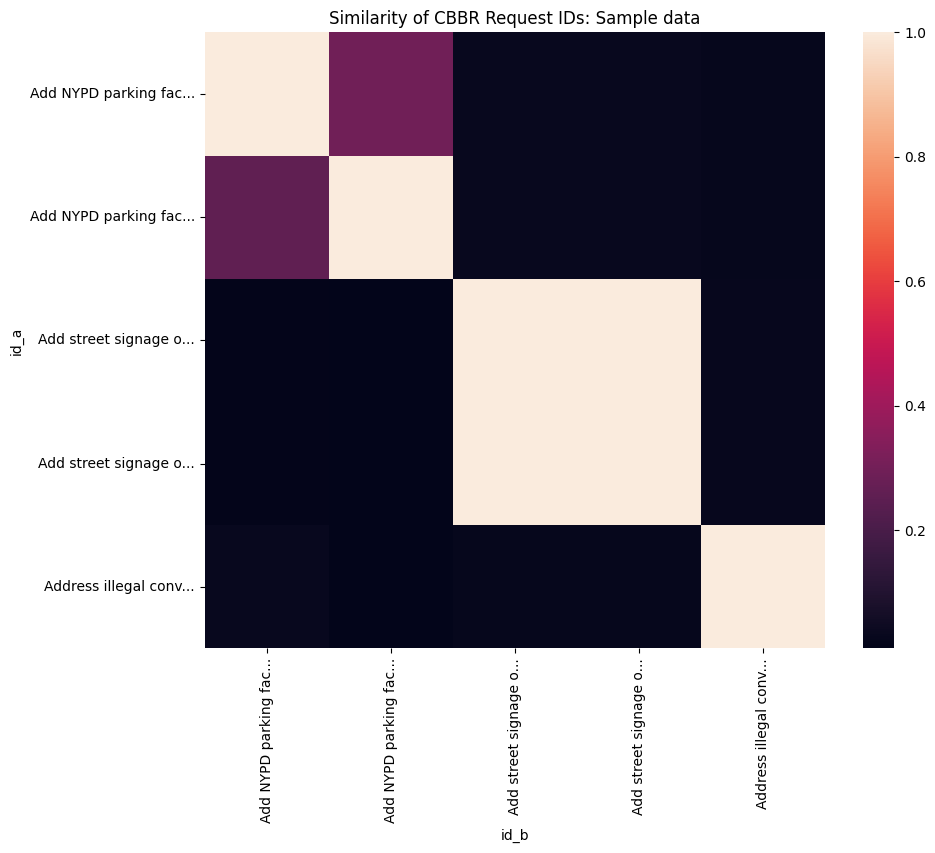

In [62]:
similarity_heatmap(df_sample_similarities_pivot, "Similarity of CBBR Request IDs: Sample data")

All requests from a Community District


In [63]:
QN04_request_ids = df_original_requests_QN04[request_id_column]
df_QN04_similarities = calculate_id_similarities(QN04_request_ids)
df_QN04_similarities_pivot = df_QN04_similarities.pivot(
    index="id_a", columns="id_b", values="similarity"
)

/var/folders/51/ql0t6r6d6b9bmm7g496p1_f80000gq/T/ipykernel_50888/946958574.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  similarities = pd.concat([similarities, id_results], ignore_index=True)


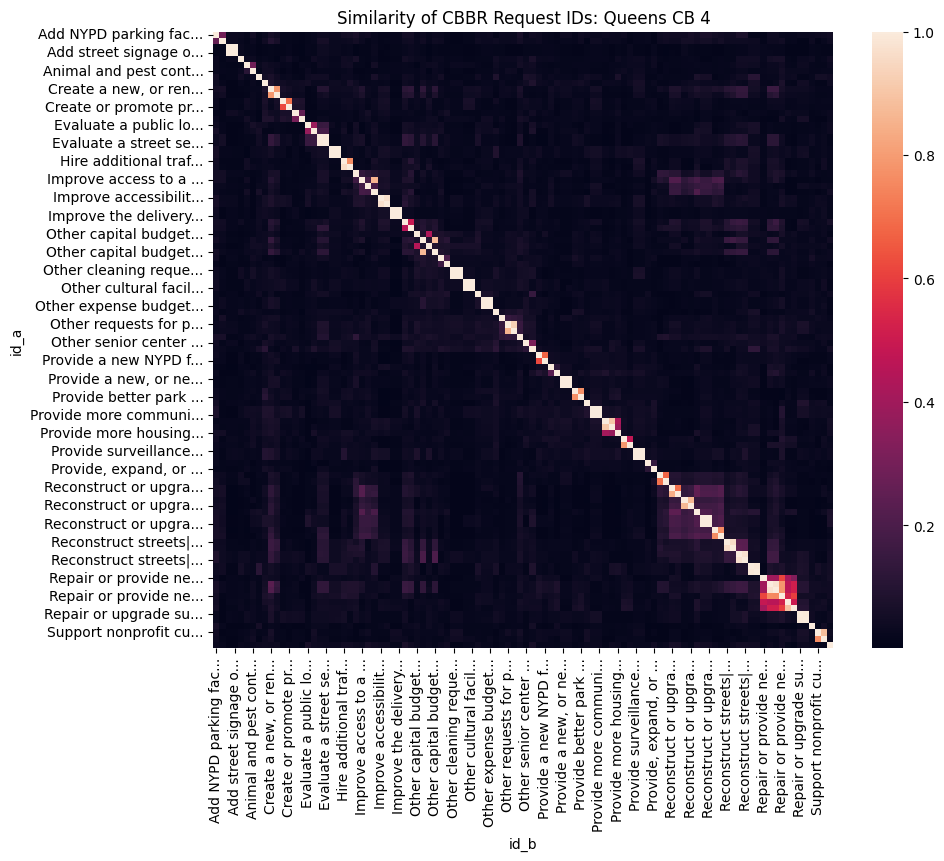

In [64]:
similarity_heatmap(df_QN04_similarities_pivot, "Similarity of CBBR Request IDs: Queens CB 4")

Each year's requests from a Community District

In [65]:
QN04_2024_request_ids = df_original_requests_QN04[df_original_requests_QN04["version"] == "FY2024"][request_id_column]
df_QN04_2024_similarities = calculate_id_similarities(QN04_2024_request_ids)
df_QN04_2024_similarities_pivot = df_QN04_2024_similarities.pivot(
    index="id_a", columns="id_b", values="similarity"
)

/var/folders/51/ql0t6r6d6b9bmm7g496p1_f80000gq/T/ipykernel_50888/946958574.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  similarities = pd.concat([similarities, id_results], ignore_index=True)


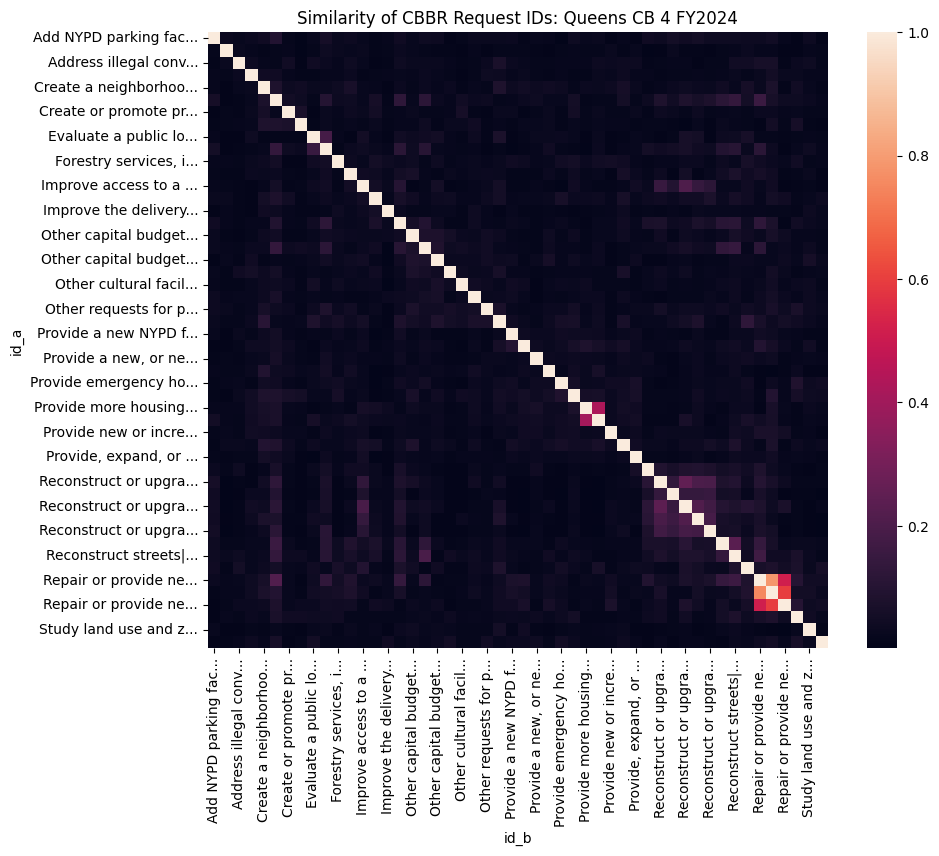

In [66]:
similarity_heatmap(df_QN04_2024_similarities_pivot, "Similarity of CBBR Request IDs: Queens CB 4 FY2024")

In [ ]:
QN04_2025_request_ids = df_original_requests_QN04[df_original_requests_QN04["version"] == "FY2025"][request_id_column]
df_QN04_2025_similarities = calculate_id_similarities(QN04_2025_request_ids)
df_QN04_2025_similarities_pivot = df_QN04_2025_similarities.pivot(
    index="id_a", columns="id_b", values="similarity"
)

In [ ]:
similarity_heatmap(df_QN04_2025_similarities_pivot, "Similarity of CBBR Request IDs: Queens CB 4 FY2025")

### Focus on all Community Districts

In [ ]:
request_ids = df_original_requests[request_id_column]
request_ids_2024 = df_original_requests[df_original_requests["version"] == "FY2024"][request_id_column]
request_ids_2025 = df_original_requests[df_original_requests["version"] == "FY2025"][request_id_column]

In [ ]:
df_original_requests.value_counts(["borough"])

In [ ]:
# request_ids_sample = df_original_requests[(df_original_requests["version"] == "FY2024") & (df_original_requests["borough"] == "SI")][request_id_column]
df_requests_sample = df_original_requests[df_original_requests["borough"].isin(["SI", "Staten Island"])]
request_ids_sample = df_requests_sample[request_id_column]

In [ ]:
df_similarities_sample = calculate_id_similarities(request_ids_sample)
df_similarities_sample_pivot = df_similarities_sample.pivot(
    index="id_a", columns="id_b", values="similarity"
)

In [ ]:
similarity_heatmap(df_similarities_sample_pivot, "Similarity of CBBR Request IDs (Staten Island)")

In [ ]:
df_similarities_interesting_sample = df_similarities_sample[(df_similarities_sample["similarity"] > 0.9) & (df_similarities_sample["similarity"] != 1)]
df_similarities_interesting_sample

## Standardize original requests

In [ ]:
df_original_requests.shape

### Drop duplicates caused by double spaces

Some requests only differ due to double spaces

In [ ]:
print(df_similarities_interesting_sample.iloc[0]["id_a"])
print(df_similarities_interesting_sample.iloc[0]["id_b"])

In [ ]:
print(df_similarities_interesting_sample.iloc[0]["id_a"].replace("  ", " "))
print(df_similarities_interesting_sample.iloc[0]["id_b"])

In [ ]:
df_standardized_original_requests = df_original_requests.copy()
df_standardized_original_requests[request_id_column] = df_standardized_original_requests[request_id_column].str.replace("  ", " ")

In [ ]:
df_standardized_requests_sample = df_standardized_original_requests[df_standardized_original_requests["borough"].isin(["SI", "Staten Island"])]
standardized_request_ids_sample = df_standardized_requests_sample[request_id_column]
df_standardized_requests_sample[df_standardized_requests_sample.duplicated(subset=request_id_column, keep=False)]

In [ ]:
df_standardized_original_requests = df_standardized_original_requests.drop_duplicates(subset=request_id_column)
df_standardized_original_requests[df_standardized_original_requests.duplicated(subset=request_id_column, keep=False)]

### Drop duplicates caused by lack of spaces

Some requests only differ due to lack of spaces between words

In [ ]:
print(df_similarities_interesting_sample.iloc[2]["id_a"])
print(df_similarities_interesting_sample.iloc[2]["id_b"])

In [ ]:
print(df_similarities_interesting_sample.iloc[2]["id_a"].replace(" ", ""))
print(df_similarities_interesting_sample.iloc[2]["id_b"].replace(" ", ""))

In [ ]:
df_standardized_original_requests[request_id_column] = df_standardized_original_requests[request_id_column].str.replace(" ", "")

In [ ]:
df_standardized_requests_sample = df_standardized_original_requests[df_standardized_original_requests["borough"].isin(["SI", "Staten Island"])]
standardized_request_ids_sample = df_standardized_requests_sample[request_id_column]
df_standardized_requests_sample[df_standardized_requests_sample.duplicated(subset=request_id_column, keep=False)]

In [ ]:
df_standardized_original_requests = df_standardized_original_requests.drop_duplicates(subset=request_id_column)
df_standardized_original_requests[df_standardized_original_requests.duplicated(subset=request_id_column, keep=False)]

### Drop duplicates caused by "Community Board" synonyms

In [ ]:
print(df_standardized_original_requests.iloc[0].loc[request_id_column])
print(df_standardized_original_requests.iloc[1].loc[request_id_column])

In [ ]:
print(df_standardized_original_requests.iloc[0].loc[request_id_column])
print(df_standardized_original_requests.iloc[1].loc[request_id_column].replace("CommunityBoard", "CB"))
print(df_standardized_original_requests.iloc[1].loc[request_id_column].replace("CommunityBoard#", "CB"))

In [ ]:
df_standardized_original_requests[request_id_column] = df_standardized_original_requests[request_id_column].str.replace("CommunityBoard", "CB")
df_standardized_original_requests[request_id_column] = df_standardized_original_requests[request_id_column].str.replace("CommunityBoard#", "CB")
df_standardized_original_requests[request_id_column] = df_standardized_original_requests[request_id_column].str.replace("CB#", "CB")

In [ ]:
df_standardized_original_requests[df_standardized_original_requests.duplicated(subset=request_id_column, keep=False)]

### Drop duplicates due to punctuation

In [ ]:
df_standardized_original_requests[request_id_column] = df_standardized_original_requests[request_id_column].str.replace(".", "")

In [ ]:
df_standardized_original_requests[df_standardized_original_requests.duplicated(subset=request_id_column, keep=False)]

In [ ]:
df_standardized_original_requests = df_standardized_original_requests.drop_duplicates(subset=request_id_column)
df_standardized_original_requests[df_standardized_original_requests.duplicated(subset=request_id_column, keep=False)]

## Review standardized original requests

In [ ]:
df_standardized_original_requests

In [ ]:
a = df_all.copy()
a["cb_label"] = a["cb_label"].str.replace(" ", "")
a_2024 = a[a["version"] == "FY2024"]
a_2025 = a[a["version"] == "FY2025"]
requests_counts = a.groupby(["cb_label"]).size().reset_index(name="count_requests").sort_values(by="cb_label")
requests_2024_counts = a_2024.groupby(["cb_label"]).size().reset_index(name="count_2024_requests").sort_values(by="cb_label")
requests_2025_counts = a_2025.groupby(["cb_label"]).size().reset_index(name="count_2025_requests").sort_values(by="cb_label")

In [ ]:
x = df_standardized_original_requests.copy()
x["cb_label"] = x["cb_label"].str.replace(" ", "")
original_requests_counts = x.groupby(["cb_label"]).size().reset_index(name="count_original_requests").sort_values(by="cb_label")


In [ ]:
dfs = [
    requests_counts,
    original_requests_counts,
    requests_2024_counts,
    requests_2025_counts,
]
combined_requests_counts = pd.concat([x.set_index("cb_label") for x in dfs], axis=1, join="outer").replace(np.nan, 0)
combined_requests_counts["count_2025_requests"] = combined_requests_counts["count_2025_requests"].astype(int)

combined_requests_counts["count_repeat_requests"] = (
    combined_requests_counts["count_requests"]
    - combined_requests_counts["count_original_requests"]
)
combined_requests_counts["percent_repeat_requests"] = round(
    combined_requests_counts["count_repeat_requests"]
    / combined_requests_counts["count_requests"]
    * 100,
    2,
)
combined_requests_counts = combined_requests_counts.sort_values(by=["percent_repeat_requests"])
combined_requests_counts

In [ ]:
sns.histplot(combined_requests_counts[combined_requests_counts["count_2025_requests"] != 0], x="percent_repeat_requests", binwidth=10)

In [ ]:
sample = a[a["cb_label"] == "BX01"]
sample

In [ ]:
similarity_heatmap(df_similarities_sample_pivot, "Similarity of CBBR Request IDs (Staten Island, Standardized)")

In [ ]:
similarity_heatmap(df_similarities_sample_pivot, "Similarity of CBBR Request IDs (Staten Island)")

In [ ]:
df_similarities_pivot = calculate_id_similarities(request_ids).pivot(
    index="id_a", columns="id_b", values="similarity"
)
df_similarities_2024_pivot = calculate_id_similarities(request_ids_2024).pivot(
    index="id_a", columns="id_b", values="similarity"
)
df_similarities_2025_pivot = calculate_id_similarities(request_ids_2025).pivot(
    index="id_a", columns="id_b", values="similarity"
)

In [ ]:
similarity_heatmap(df_similarities_2024_pivot, "Similarity of CBBR Request IDs (FY2024)")

In [ ]:
similarity_heatmap(df_similarities_2025_pivot, "Similarity of CBBR Request IDs (FY2024)")

In [ ]:
similarity_heatmap(df_similarities_pivot, "Similarity of CBBR Request IDs")

In [ ]:
df_sample_similarities_no_selfs = df_sample_similarities[
    df_sample_similarities["similarity"] != 1
].sort_values(by="similarity")
df_sample_similarities_no_selfs

In [ ]:
sns.histplot(data=df_sample_similarities_no_selfs, x="similarity", binwidth=0.01)

In [ ]:
sns.histplot(data=df_sample_similarities_no_selfs, x="similarity", log_scale=True)

In [ ]:
df_sample_similarities_interesting = df_sample_similarities_no_selfs[
    df_sample_similarities_no_selfs["similarity"] >= 0.5
]
df_sample_similarities_interesting